In [7]:
#imports


import numpy as np
import matplotlib.pyplot as plt


In [8]:
#Parameters

S, K, sigma, T,r = 100,99,0.2,1,0.06

stock price S evolves in the risk neutral world:
$$dS = rSdt + \sigma SdZ $$
$$ N = \frac{T}{\Delta t}$$
$$ S^n = S(n\Delta t) $$
Euler method:
$$ S^{n+1} = S^n + S^n (r \Delta t + \sigma \phi \sqrt{\Delta t}$$

Price of option is calculated by:

$$V(S^0, t=0) = e-^{rT} \frac{\sum_{m=1}^{M} \text{pay off }f^m (S^N)}{M}$$

In [49]:

def geo_paths(S, T, r, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r  - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
    print(np.exp(ST))
    return np.exp(ST)


[[ 99.94350544 111.77668345 102.14918438 104.59394697  96.57972955
   96.26831531 106.69812219  90.36327479  96.82126408 102.32461449]
 [103.20701152 109.18382174  97.83988799 100.77557336 113.95178264
  105.97310097 112.02607028  95.3504139  105.53987003 107.43512789]
 [106.00555123 104.04715417 106.60455895 100.78082631 113.47594668
  111.86569482 104.93991033  96.86206625 110.16429407 104.20636627]
 [120.6648594  111.96547849 104.99419    100.66885963 101.05141252
  118.05124321 106.93003549  87.55808026 107.04236932 111.73211393]
 [106.95753427 121.52035895 104.51247641 101.69256911 104.07626751
  123.79083662 100.51585109  89.25225134 108.03667326 107.21860426]
 [126.04025198 137.34905526 118.48930529 102.46886904 114.72086155
  140.38792702  90.91001644  71.24660767 106.08107931 109.7615803 ]
 [114.42987386 133.79237333 120.74867637  92.61877784 117.49345399
  136.98213559  99.69739035  71.56078192 107.30715255 110.02908639]
 [108.34275875 133.25788463 115.32486256 102.59212777 1

Text(0.5,1,'Geometric Brownian Motion')

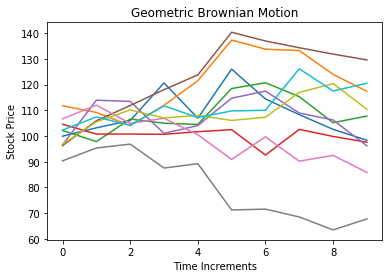

In [50]:
paths = geo_paths(S,T,r,sigma,steps=10, N=10)
#print(paths)

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

In [31]:
K=99
r=0.06
T=1
payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting back to present value
option_price


11.501627426039892

compared to the black scholes price of $11.544280227051097$